## Importing libraries

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

#Load image
image = cv2.imread('images/test.jpg')
orig_image = image.copy()

gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

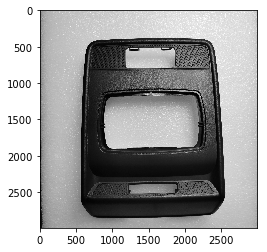

In [2]:
plt.imshow(gray,cmap='gray')

In [3]:
img = gray.copy()

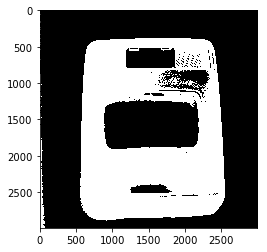

In [4]:
blurred_img = cv2.bilateralFilter(img,9,75,75)
ret,th1 = cv2.threshold(blurred_img,127,255,cv2.THRESH_BINARY_INV)
plt.imshow(th1,cmap='gray')

In [5]:
contours= cv2.findContours(th1, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = contours[0] if len(contours) == 2 else contours[1]
contours = sorted(contours, key = cv2.contourArea, reverse = True)
x,y,w,h = cv2.boundingRect(contours[0])

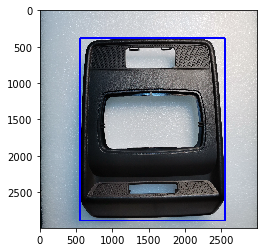

In [6]:
cv2.rectangle(orig_image,(x,y),(x+w,y+h),(0,0,255),20)
plt.imshow(orig_image)

In [7]:
ROI = orig_image[y:y+h,x:x+w]

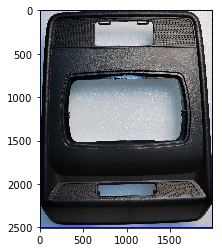

In [8]:
plt.imshow(ROI)

## Creating ROI function

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
image = cv2.imread('images/test.jpg')

In [5]:
def detect_roi(image):
    orig_image = image.copy()
    gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    img = gray.copy()
    blurred_img = cv2.bilateralFilter(img,9,75,75)
    ret,th1 = cv2.threshold(blurred_img,127,255,cv2.THRESH_BINARY_INV)
    contours= cv2.findContours(th1, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours = contours[0] if len(contours) == 2 else contours[1]
    contours = sorted(contours, key = cv2.contourArea, reverse = True)
    x,y,w,h = cv2.boundingRect(contours[0])
    ROI = orig_image[y:y+h,x:x+w]
    return ROI

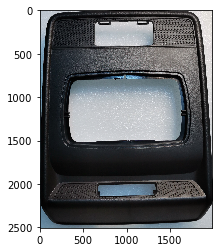

In [6]:
plt.imshow(detect_roi(image))

In [11]:
image2 = cv2.imread('images/test3.jpg')

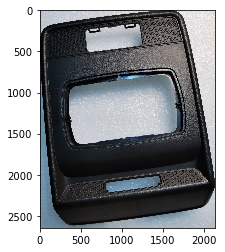

In [12]:
plt.imshow(detect_roi(image2))

In [10]:
image3 = cv2.imread('images/test4.jpg')

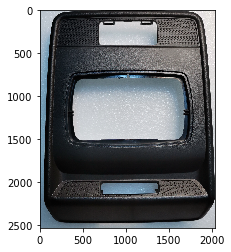

In [13]:
plt.imshow(detect_roi(image3))

In [14]:
image4 = cv2.imread('images/test5.jpg')

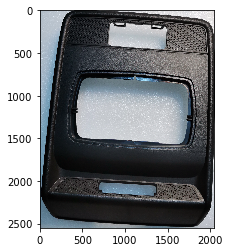

In [15]:
plt.imshow(detect_roi(image4))